import libs

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(len(os.listdir("../input/train")))

# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/train'

In [2]:
os.mkdir("modifiedtrain")
os.mkdir("modifiedtrain/cat")
os.mkdir("modifiedtrain/dog")

In [3]:
os.listdir("modifiedtrain")

['dog', 'cat']

In [4]:
from shutil import copyfile
for file in os.listdir("../input/train"):
    name=file.split('.')[0]
    filename="../input/train/"+file
    if name=='cat':
        copyfile(filename,"modifiedtrain/cat/"+file)
    elif name=='dog':
        copyfile(filename,"modifiedtrain/dog/"+file)
    
    

In [5]:
os.listdir("modifiedtrain/dog/")

['dog.8867.jpg',
 'dog.601.jpg',
 'dog.4601.jpg',
 'dog.9482.jpg',
 'dog.9673.jpg',
 'dog.2309.jpg',
 'dog.2664.jpg',
 'dog.833.jpg',
 'dog.922.jpg',
 'dog.11156.jpg',
 'dog.657.jpg',
 'dog.2576.jpg',
 'dog.11881.jpg',
 'dog.1481.jpg',
 'dog.10241.jpg',
 'dog.4131.jpg',
 'dog.10279.jpg',
 'dog.574.jpg',
 'dog.8091.jpg',
 'dog.10016.jpg',
 'dog.11295.jpg',
 'dog.1959.jpg',
 'dog.1550.jpg',
 'dog.193.jpg',
 'dog.8242.jpg',
 'dog.5575.jpg',
 'dog.4069.jpg',
 'dog.6091.jpg',
 'dog.5591.jpg',
 'dog.8347.jpg',
 'dog.2682.jpg',
 'dog.2568.jpg',
 'dog.9516.jpg',
 'dog.3522.jpg',
 'dog.3854.jpg',
 'dog.12179.jpg',
 'dog.3839.jpg',
 'dog.2814.jpg',
 'dog.2543.jpg',
 'dog.116.jpg',
 'dog.4023.jpg',
 'dog.3835.jpg',
 'dog.8150.jpg',
 'dog.7445.jpg',
 'dog.12193.jpg',
 'dog.1197.jpg',
 'dog.9266.jpg',
 'dog.1483.jpg',
 'dog.177.jpg',
 'dog.10418.jpg',
 'dog.8646.jpg',
 'dog.11943.jpg',
 'dog.8793.jpg',
 'dog.8213.jpg',
 'dog.6111.jpg',
 'dog.11361.jpg',
 'dog.592.jpg',
 'dog.6839.jpg',
 'dog.404.jp

Populating the interactive namespace from numpy and matplotlib


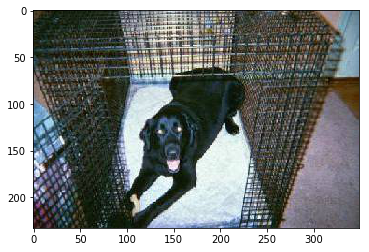

In [6]:
%pylab inline
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('modifiedtrain/dog/dog.411.jpg')
plt.imshow(image)
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255)


In [9]:
train_generator=train_datagen.flow_from_directory("modifiedtrain/",batch_size=20,target_size=(150,150),
                                                  class_mode='binary')

Found 25000 images belonging to 2 classes.


In [10]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [13]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=15)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
1250/1250 [==============================] - 121s 96ms/step - loss: 0.5589 - acc: 0.7172
Epoch 2/15
1250/1250 [==============================] - 118s 95ms/step - loss: 0.4283 - acc: 0.8058
Epoch 3/15
1250/1250 [==============================] - 117s 94ms/step - loss: 0.3792 - acc: 0.8354
Epoch 4/15
1250/1250 [==============================] - 117s 93ms/step - loss: 0.3418 - acc: 0.8557
Epoch 5/15
1250/1250 [==============================] - 115s 92ms/step - loss: 0.3157 - acc: 0.8713
Epoch 6/15
1250/1250 [==============================] - 114s 91ms/step - loss: 0.2954 - acc: 0.8817
Epoch 7/15
1250/1250 [==============================] - 114s 91ms/step - loss: 0.2818 - acc: 0.8885
Epoch 8/15
1250/1250 [==============================] - 114s 91ms/step - loss: 0.2718 - acc: 0.89542s - loss: 0.2716 - acc: 0.89 - ETA: 2s - l
Epoch 9/15
1250/1250 [==============================] - 113s 90ms/step - loss: 0.2689 - acc: 0.8992
Epoch 10/

In [16]:
!pip install wget

  Stored in directory: /tmp/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import wget
url='https://ichef.bbci.co.uk/images/ic/720x405/p0517py6.jpg'
wget.download(url, 'test_image.jpg')

'test_image.jpg'

In [19]:
import matplotlib.pyplot as plt

In [20]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

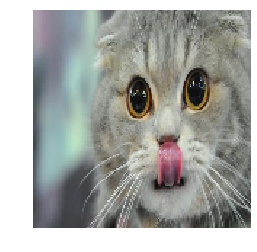

array([[0.30230254]], dtype=float32)

In [22]:
from tensorflow.keras.preprocessing import image
img = load_image('test_image.jpg',True)
model.predict(img)

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
train_generator=train_datagen.flow_from_directory("modifiedtrain/",batch_size=20,target_size=(150,150),
                                                  class_mode='binary')

In [ ]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=5)

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
train_generator=train_datagen.flow_from_directory("modifiedtrain/",batch_size=20,target_size=(256,256),
                                                  class_mode='binary')

In [ ]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=5)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend(loc=0)
plt.figure()